We study the ODE's governing a GRU in two dimensions. The system of differential equations is
\begin{eqnarray}
\frac{\dot{x}(t)}{1 - z_x(t)} &=& -x(t) + t_x \tag{1} \\
\frac{\dot{y}(t)}{1 - z_y(t)} &=& -y(t) + t_y \tag{2}
\end{eqnarray}
where
\begin{equation}\tag{3}
\begin{pmatrix}t_x \\ t_y \end{pmatrix} = \tanh\left(U_h [h(t)\odot r(t)] + b_h)\right),
\end{equation}
$z_x(t), z_y(t)$ are components of the vector $z(t)$ defined by
\begin{equation}\tag{4}
z(t) = \sigma(U_z h(t) + b_z)
\end{equation}
and
\begin{equation}\tag{5}
r(t) = \sigma(U_r h(t) + b_r).
\end{equation}

$U_h, U_r, U_z$ are $2 \times 2$ constant matrices and $b_h, b_r, b_z \in \mathbb{R}^2$ are constant vectors.

In our first experiment, we will use
\begin{equation}\tag{6}
U_h = \begin{pmatrix} 3 & 0 \\ 0 & 3 \end{pmatrix},
\end{equation}
$U_r = U_z = 0$ and $b_h = b_r = b_z = 0$. For this choice of constants $r = z = (0.5, 0.5)^T$, $t = 3/4(1, 1)^T$ and the system of ODE simplifies to
\begin{eqnarray}
\dot{x}(t)&=&-\frac{x(t)}{2}+\frac{1}{2}\tanh\left(\frac{3x}{2}\right)\tag{7} \\
\dot{y}(t)&=&-\frac{y(t)}{2}+\frac{1}{2}\tanh\left(\frac{3y}{2}\right) \tag{8}
\end{eqnarray}
The stable points in figure 2 of the paper by [Jordan, Sokol and Park](https://arxiv.org/pdf/1906.01005.pdf) are marked on the phase portrait constructed in the cell below this one. 


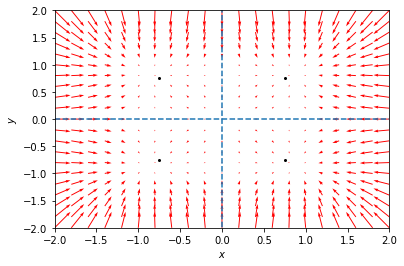

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x, y):
  return [0.5*(np.tanh(1.5*x) - x), 0.5 * (np.tanh(1.5*y) - y)]

# Create the grid in the domain [-1, 1] x [-1, 1].
lo, hi = -2, 2
X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
u, v = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    xp = f(X[i, j], Y[i, j])
    u[i,j] = xp[0]
    v[i,j] = xp[1]
     
Q = plt.quiver(X, Y, u, v, color='r')
plt.plot(0.75, 0.75, 'o', color='black', markersize = 2)
plt.plot(0.75, -0.75, 'o', color='black', markersize = 2)
plt.plot(-0.75, -0.75, 'o', color='black', markersize = 2)
plt.plot(-0.75, 0.75, 'o', color='black', markersize = 2)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([lo, hi])
plt.ylim([lo, hi])
plt.axhline(xmin = lo, xmax = hi, linestyle = '--')
plt.axvline(ymin = lo, ymax = hi, linestyle = '--')

We next implement the ODE whose parameters are defined by equation (8) of the paper by [Jordan, Sokol and Park](https://arxiv.org/pdf/1906.01005.pdf). The system of equations is
\begin{eqnarray}
\dot{x} &=& -\frac{x}{2}+\frac{1}{2}\tanh\left(\frac{3}{4}(x\cos\alpha - y\sin\alpha)\right) \tag{9} \\
\dot{y} &=& -\frac{y}{2}+\frac{1}{2}\tanh\left(\frac{3}{4}(x\sin\alpha + y\cos\alpha)\right) \tag{9}
\end{eqnarray}


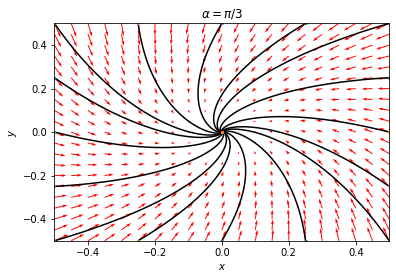

In [2]:
def f1(h,t, alpha = np.pi/6,extra=0):
    [x, y] = h
    xdot = 0.5*(np.tanh(0.75*(x*np.cos(alpha)-y*np.sin(alpha))) - x)
    ydot = 0.5*(np.tanh(0.75*(x*np.sin(alpha)+y*np.cos(alpha))) - y)

    return [xdot, ydot]

# Create the grid in the domain [-1, 1] x [-1, 1].
lo, hi = -0.5, 0.5
X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
u, v = np.zeros(X.shape), np.zeros(Y.shape)

alpha = np.pi/1.4

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    xp = f1([X[i, j], Y[i, j]], 0,alpha)
    u[i,j] = xp[0]
    v[i,j] = xp[1]
   
Q = plt.quiver(X, Y, u, v, color='r')
plt.title(r'$\alpha = \pi/3$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([lo, hi])
plt.ylim([lo, hi])
x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
          [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
          [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
          [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

for x_init in x_inits:  
    times = np.linspace(0, 50, 2000)  
    xs = odeint(f1, x_init, times,args=(alpha,0))
    plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
    plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
    plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 2) # end


The Andronov-Hopf bifurcation occurs at about $\pi/3.8$. We run the same code but at this value of $\alpha$.

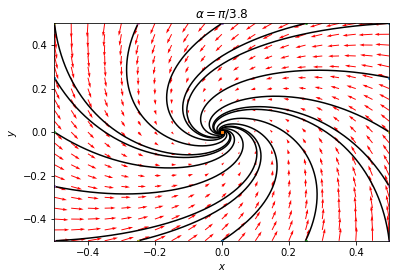

In [3]:
def f2(h,t,alpha = np.pi/6,extra=0):
    [x, y] = h
    xdot = 0.5*(np.tanh(0.75*(x*np.cos(alpha)-y*np.sin(alpha))) - x)
    ydot = 0.5*(np.tanh(0.75*(x*np.sin(alpha)+y*np.cos(alpha))) - y)

    return [xdot, ydot]

# Create the grid in the domain [-1, 1] x [-1, 1].
lo, hi = -0.5, 0.5
X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
u, v = np.zeros(X.shape), np.zeros(Y.shape)

alpha = np.pi/6

for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    xp = f2([X[i, j], Y[i, j]],0,alpha)
    u[i,j] = xp[0]
    v[i,j] = xp[1]
   
Q = plt.quiver(X, Y, u, v, color='r')
plt.title(r'$\alpha = \pi/3.8$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim([lo, hi])
plt.ylim([lo, hi])
x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
          [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
          [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
          [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

for x_init in x_inits:
    times = np.linspace(0, 50, 2000)
    xs = odeint(f2, x_init, times,args=(alpha,0))
    plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
    plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
    plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 2) # end
